                                                  ERROR  SURFACE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = {
    'x': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5],
    'y': [7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5]
}
df = pd.DataFrame(df)

x= df[['x'] ]
y = df['y']   
lr = LinearRegression()

lr.fit(x, y)
m=lr.coef_
b=lr.intercept_
print(m)
print(b)

[1.]
6.000000000000002


In [2]:
s_range = np.linspace(-2, 2, 10) 
i_range = np.linspace(-7, 7, 10)  
m_v = np.zeros((len(s_range), len(i_range)))
actual_z = y.values 


In [3]:
for i, m in enumerate(s_range):
    for j, b in enumerate(i_range):
        predicted_z = m * x.values.flatten() + b
        mse = np.mean((actual_z - predicted_z) ** 2)
        m_v[i, j] = mse

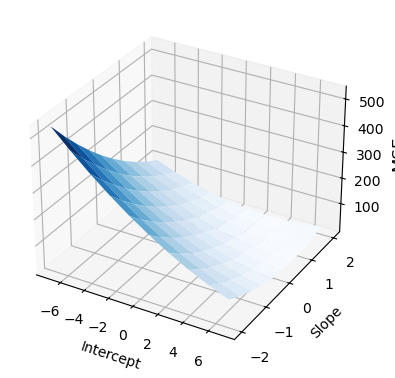

In [21]:
x1, y1 = np.meshgrid(i_range, s_range)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x1, y1, m_v, cmap='Blues')

ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('MSE',fontsize=12, color='black', rotation=90)

plt.show()

Text(0.5, 1.0, 'Accuracy  with  Distance Metrics')

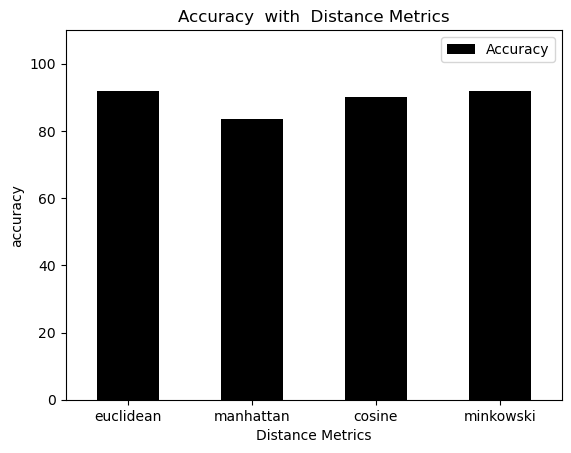

In [65]:

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split as tt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df=pd.read_csv(r"C:\Users\hanal\Downloads\dataset.csv")
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
ac = []
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'minkowski'] 
x_tr, x_te, y_tr, y_te = tt(x_scaled, y, test_size=0.20, random_state=42)
for metric in distance_metrics:
    k = KNeighborsClassifier(metric=metric)
    k.fit(x_tr, y_tr) 
    y_p = k.predict(x_te) 
    acc = accuracy_score(y_te, y_p) * 100 
    ac.append(acc)
acc_f = pd.DataFrame({'Distance Metrics': distance_metrics, 'Accuracy': ac})
acc_f.set_index('Distance Metrics', inplace=True)
ax = acc_f.plot(kind='bar', color='black')
plt.ylim(0, 110)  
plt.xticks(rotation=0)  
plt.ylabel('accuracy')  
plt.title('Accuracy  with  Distance Metrics')  